# Statistics for Data Science

# Sampling

In [1]:
import numpy as np

### Study Case: 
##### We want to know the mean of the ages of people who live in a city. 
##### It is impossible to ask their age to everyone and we are choosing 100 people as a sample. 

In [2]:
population = np.random.randint(0, 80, 10000) # 10.000 people live in that city, their ages are between 0-80.

In [3]:
population[0:10]

array([ 0, 37, 40, 12, 16, 39,  3, 23, 30, 36])

In [4]:
#sampling frame
np.random.seed(115)
sample = np.random.choice(a = population, size = 100)
sample[0:10]

array([34,  8, 45, 46,  8, 24, 68, 42, 13, 77])

In [5]:
sample.mean()

36.97

In [6]:
population.mean()

39.5171

In [7]:
# sample mean=38.29    population mean=39.11 
# We achieved strong information from sample about the mean of population.

In [8]:
#distirubition of sample

In [9]:
np.random.seed(10)
sample1 = np.random.choice(a = population, size = 100)
sample2 = np.random.choice(a = population, size = 100)
sample3 = np.random.choice(a = population, size = 100)
sample4 = np.random.choice(a = population, size = 100)
sample5 = np.random.choice(a = population, size = 100)
sample6 = np.random.choice(a = population, size = 100)
sample7 = np.random.choice(a = population, size = 100)
sample8 = np.random.choice(a = population, size = 100)
sample9 = np.random.choice(a = population, size = 100)
sample10 = np.random.choice(a = population, size = 100)

In [10]:
(sample1.mean() + sample2.mean() + sample3.mean() + sample4.mean() + sample5.mean() 
+ sample6.mean() + sample7.mean() + sample8.mean() + sample9.mean() + sample10.mean() )  / 10

40.004000000000005

In [11]:
# As we see, the mean of the samples's means is closer to population mean!!!
# Central Limit Theorem

In [12]:
sample1.mean()

43.83

In [13]:
sample2.mean()

40.33

# Descriptive Statistics

In [14]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [16]:
!pip install researchpy
import researchpy as rp

In [17]:
rp.summary_cont(df[["total_bill","tip","size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [18]:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


### Covariance and Correlation
##### Covariance is a measure of the joint variability of two random variables. 
##### Correlation is that whether causal or not, between two random variables or bivariate data. 

In [19]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [20]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


# Business Case Example: Price Strategy Decision Support

#### Problem: The CEO wants a scientific basis and flexibility in price setting.
#### 
##### In this study, there are a seller, customers and a product. 
##### We ask customers that what they would pay for this product. Nobody see the others' offer. 
##### We want to determine optimum price.

In [21]:
import numpy as np
prices = np.random.randint(10,110, 1000) #Let's say we surveyed 1000 people and the price they gave for the product ranged from 10 to 110 euros.

In [22]:
prices.mean()

58.492

#### Let's calculate the confidence interval

In [23]:
import statsmodels.stats.api as sms

In [24]:
sms.DescrStatsW(prices).tconfint_mean()

(56.67953887736034, 60.30446112263965)

#### What is the confidence interval?
Confidence interval is a kind of interval estimation for a population parameter in statistics 
and is an inferential statistical solution tool. 
Instead of estimating a population parameter value with a single number, 
there is a range of two (lower and upper limit) numbers that can cover this parameter value.
Thus, confidence intervals show how reliable a prediction is.

According our result, we would say, we're  95  % percent confident that mean of product price is<br>
between in the interval 56,67-60,30 euro.


# Probability distribution

## Bernoulli Distribution

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [29]:
from scipy.stats import bernoulli

In [30]:
p = 0.6

In [31]:
rv = bernoulli(p)
rv.pmf(k = 0)

0.4

## Law of large numbers

**The law of large numbers is a probability theorem that describes the long-run stability of a random variable .**

In [39]:
import numpy as np
rng = np.random.RandomState(123)



In [42]:

for i in np.arange(1,21):
    number_experiments = 2**i
    heads_tails = rng.randint(0, 2, size = number_experiments)
    head_prob = np.mean(heads_tails)
    print("number of attempts :",number_experiments,"---",'Probability of Head: %.2f' % (head_prob * 100))

number of attempts : 2 --- Probability of Head: 50.00
number of attempts : 4 --- Probability of Head: 0.00
number of attempts : 8 --- Probability of Head: 62.50
number of attempts : 16 --- Probability of Head: 43.75
number of attempts : 32 --- Probability of Head: 46.88
number of attempts : 64 --- Probability of Head: 56.25
number of attempts : 128 --- Probability of Head: 50.78
number of attempts : 256 --- Probability of Head: 52.73
number of attempts : 512 --- Probability of Head: 52.93
number of attempts : 1024 --- Probability of Head: 50.20
number of attempts : 2048 --- Probability of Head: 48.58
number of attempts : 4096 --- Probability of Head: 49.49
number of attempts : 8192 --- Probability of Head: 49.58
number of attempts : 16384 --- Probability of Head: 49.96
number of attempts : 32768 --- Probability of Head: 50.00
number of attempts : 65536 --- Probability of Head: 49.68
number of attempts : 131072 --- Probability of Head: 49.97
number of attempts : 262144 --- Probability o

## The binomial distribution

#### The binomial distribution is applied to trials that yield n results in two categories <br>(i.e. success / failure , yes/no, 1/0 etc.)

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

In [44]:
from scipy.stats import binom

In [46]:
p = 0.01  # probability of success
n = 100   # number of experiment
rv = binom(n, p)
print(rv.pmf(1)) #What is the probability of getting a successful result once in an experiment repeated 100 times?
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


## Poisson distribution 

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

###### Generally, a Poisson distribution is applicable in systems where it is possible for a large number of events to occur, <br>but where it is assumed that these possible events are rare.<br>
e is the base of the natural log ( e = 2.71828...);<br>
x is the number of occurrences of the event whose probability is given by the function;<br>
x! , factorial for x<br>
λ is the expected value of the number of occurrences in the given fixed interval; a positive real number .

# Business Case Example: Calculation of advertisement entry error probabilities

Measurements are made during a year<br>
The distribution is known (poisson) and lambda 0.1 (mean number of errors)<br>
What are the probabilities of no errors, 3 errors, and 5 errors?

In [52]:
from scipy.stats import poisson

In [53]:
lambda_ = 0.1   

In [54]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))

0.9048374180359595


In [55]:
print(rv.pmf(k = 3))

0.00015080623633932676


In [56]:
print(rv.pmf(k = 5))

7.54031181696634e-08


## Normal Distribution

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  mean

* ${\displaystyle \sigma }$  standart deviation

* ${\displaystyle \sigma ^{2}}$ variance

It is used to calculate probability of **continuous variables**.

# Business Case Example: Calculation of product sales probabilities

Before an investment, it is desired to determine the probability of realization of sales at certain values for the next month.<br>
The distribution is known (normal)<br>
Monthly average sales amount 80K, standart deviation 5K<br>
Question: What is the probability of selling more than 90K?



In [68]:
from scipy.stats import norm

In [69]:
#more than 90 
1-norm.cdf(90, 80, 5)

0.02275013194817921

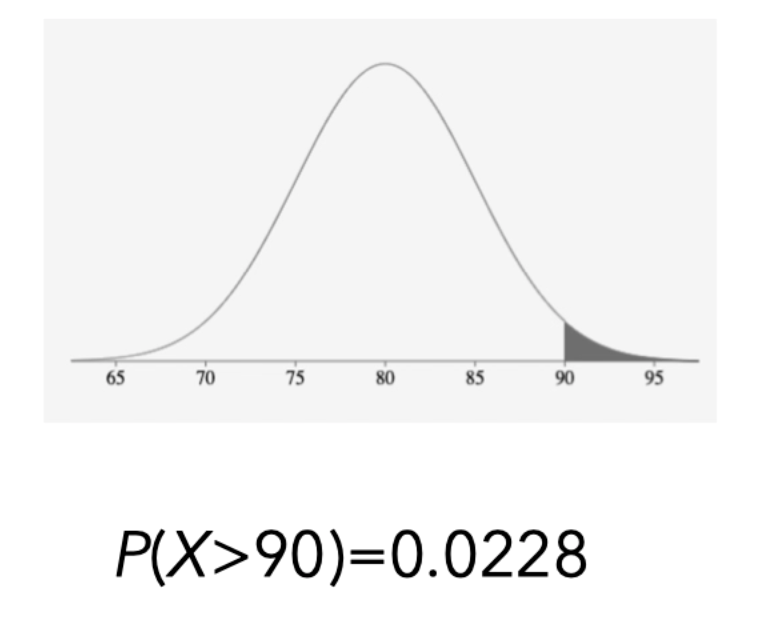

In [70]:
#more than 70
1-norm.cdf(70, 80, 5)

0.9772498680518208

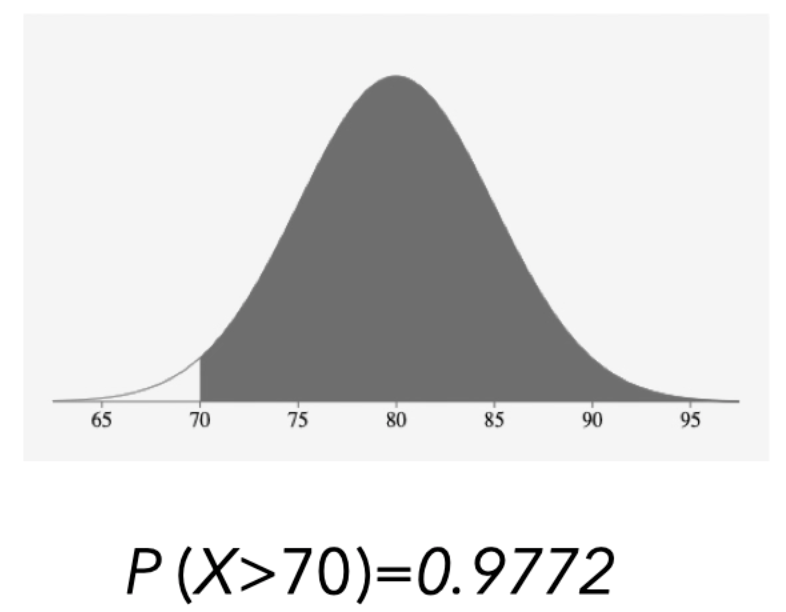

In [71]:
#less than 73
norm.cdf(73, 80, 5)

0.08075665923377107

In [72]:
#between 85 and 90 

In [73]:
norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

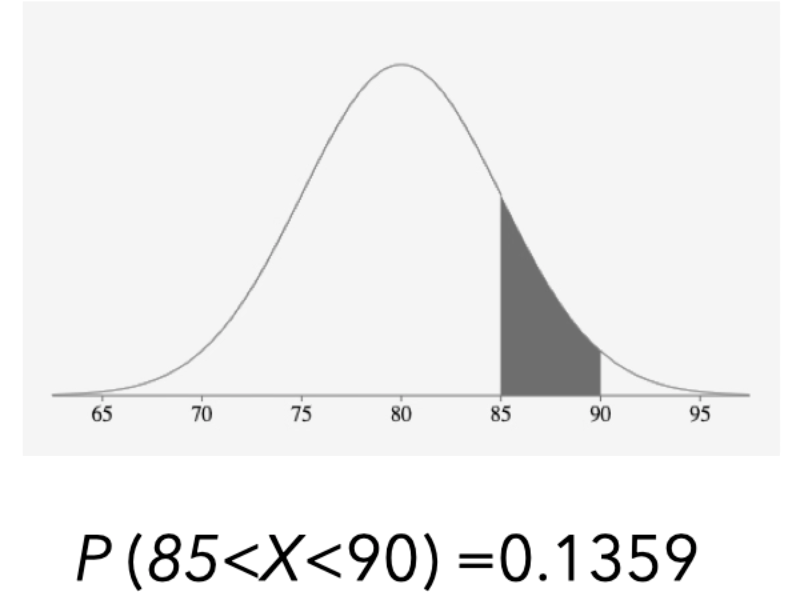

# One Sample t Test

It's used to test for sample mean.

**Hypothesis:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test Statistics:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


# Business Case Example: 'Product purchase step' optimization

**Problem:**<br>
After adding a product to the cart, there are 5 steps on the payment screen and one of these steps (4th step) is wanted to querie.<br>
**Detail:**<br>
Each step is aimed to take 20 seconds. Step 4 is being questioned.<br>
To test this situation, 100 samples are taken.<br>
The sample standard deviation is 5 s. The sample mean is 19 seconds.

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>20</i></d><br><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>20</i></d><br><br>

$\alpha =0.05$

$\alpha\div2 =0.025$

Z table probability value= 0.5 -0.025 =0.475

Z table critical value= -/+ 1,96

Zcalculate= (19-20)/5/10=-2,00       Zcalculate < Ztable ==> Ho rejected<br>
It is seen that users spend different from 20 seconds in step 4 with 95% reliability statistically.

In [17]:
import numpy as np

measurements = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [18]:
measurements[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [19]:
import scipy.stats as stats

In [20]:
stats.describe(measurements)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Assumptions

In [21]:
#normality

In [22]:
import pandas as pd

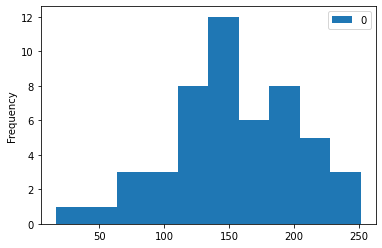

In [23]:
#histogram
pd.DataFrame(measurements).plot.hist();

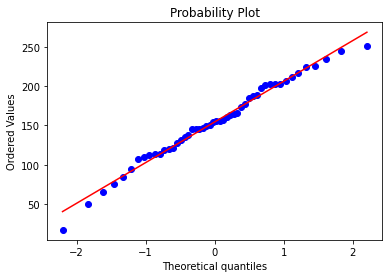

In [24]:
#qqplot
import pylab
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Test

H0: There is no statistically significantly difference between sample distribution and theoretical normal distribution.

H1: There is.....

In [25]:
from scipy.stats import shapiro

In [26]:
shapiro(measurements)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [27]:
print("T statistics: " + str(shapiro(measurements)[0]))
print(" P-value: " + str(shapiro(measurements)[1]))

T statistics: 0.9853105545043945
 P-value: 0.7848747968673706


## Application of Hypothesis Testing

In [34]:
stats.ttest_1samp(measurements, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

H0: Spending time on the website is 170 sn
H1: ...!=170

## Nonparametric One Sample Test

In [35]:
from statsmodels.stats.descriptivestats import sign_test

In [38]:
sign_test(measurements, 170)

(-7.0, 0.06490864707227219)

œ = 0.10 ===> Ho accepted

# One Sample Ratio Test

HO: p = 0.125 

H1: p != 0.125

In [39]:
from statsmodels.stats.proportion import proportions_ztest

In [40]:
count = 40
nobs = 500
value = 0.125

In [41]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

## Independent Two Sample T Test

H0: M1 = M2 

H1: M1 != M2

Data type 1

In [46]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


Data Type 2

In [47]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A and group of A
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B and group of B
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#all data
AB = pd.concat([A,B])
AB.columns = ["income","GRUP"]
print(AB.head())
print(AB.tail())

   income GRUP
0      30    A
1      27    A
2      21    A
3      27    A
4      29    A
    income GRUP
25      33    B
26      26    B
27      32    B
28      33    B
29      29    B


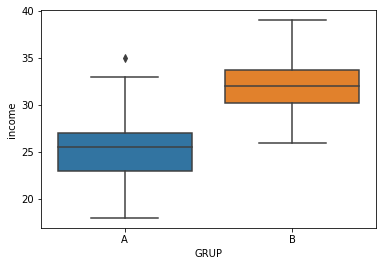

In [48]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "income", data = AB);

##check assumptions

In [49]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [50]:
AB.head()

,income,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [51]:
#normality

In [52]:
from scipy.stats import shapiro

In [53]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [54]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561261534690857, pvalue=0.2458445429801941)

In [55]:
#homogenous variance

H0: Variances are homogenous

H1: Variances are not homogenous

In [56]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hypothesis Test

In [57]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [60]:
test_statistics, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test Statistics = %.4f, p-değeri = %.4f' % (test_statistics, pvalue))

Test Statistics = -7.0287, p-değeri = 0.0000


## Nonparametric Independent Two Sample Test

In [61]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

In [62]:
test_statistics, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('test statistics = %.4f, p-değeri = %.4f' % (test_statistics, pvalue))

test statistics = 89.5000, p-değeri = 0.0000


# Dependent Two Sample T Test

In [63]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [64]:
before[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [65]:
after[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [66]:
 np.arange(len(before))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [67]:
#First Data set
Seperate = pd.concat([before, after], axis = 1)
Seperate.columns = ["BEFORE","AFTER"]
print("'Seperate' Data Set: \n\n ", Seperate.head(), "\n\n")


#Second Data set
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_BEFORE = np.arange(len(before))
GRUP_BEFORE = pd.DataFrame(GRUP_BEFORE)
GRUP_BEFORE[:] = "BEFORE"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([before, GRUP_BEFORE], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_AFTER = np.arange(len(after))
GRUP_AFTER = pd.DataFrame(GRUP_AFTER)
GRUP_AFTER[:] = "AFTER"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([after, GRUP_AFTER], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
CONCAT = pd.concat([A,B])
CONCAT

#ISIMLENDIRME
CONCAT.columns = ["PERFORMANS","BEFORE_AFTER"]
print("'CONCAT' Data Set: \n\n", CONCAT.head(), "\n")

'Seperate' Data Set: 

     BEFORE  AFTER
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'CONCAT' Data Set: 

    PERFORMANS BEFORE_AFTER
0         123       BEFORE
1         119       BEFORE
2         119       BEFORE
3         116       BEFORE
4         123       BEFORE 



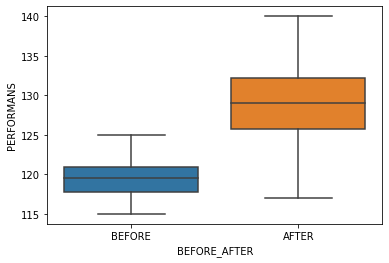

In [68]:
import seaborn as sns
sns.boxplot(x = "BEFORE_AFTER", y = "PERFORMANS", data = CONCAT);

## Check Assumptions

In [69]:
from scipy.stats import shapiro

In [70]:
shapiro(Seperate.BEFORE)

ShapiroResult(statistic=0.9543654918670654, pvalue=0.10722342133522034)

In [71]:
shapiro(Seperate.AFTER)

ShapiroResult(statistic=0.9780087471008301, pvalue=0.6159457564353943)

In [72]:
import scipy.stats as stats
stats.levene(Seperate.BEFORE, Seperate.AFTER)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

## Hypothesis Test

In [73]:
stats.ttest_rel(Seperate.BEFORE, Seperate.AFTER)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [74]:
test_statistics, pvalue = stats.ttest_rel(Seperate["BEFORE"], Seperate["AFTER"])
print('Test Statistics = %.5f, p-value = %.5f' % (test_statistics, pvalue))

Test Statistics = -9.28153, p-value = 0.00000


## Nonparametric Dependent Two Sample Test

In [75]:
stats.wilcoxon(Seperate.BEFORE, Seperate.AFTER)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [76]:
test_statistics, pvalue = stats.wilcoxon(Seperate["BEFORE"], Seperate["AFTER"])

print('Test Statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Test Statistics = 15.0000, p-value = 0.0000


## Two Sample Ratio Test

In [77]:
from statsmodels.stats.proportion import proportions_ztest

In [78]:
import numpy as np
number_of_success = np.array([300, 250])
number_of_observations = np.array([1000, 1100])

In [79]:
proportions_ztest(count = number_of_success, nobs = number_of_observations)

(3.7857863233209255, 0.0001532232957772221)

# Variance Analysis

H0: M1 = M2 = M3 (there is no differences between groups) 

H1: There is differences .....

In [80]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Check assumptions

In [81]:
from scipy.stats import shapiro

In [82]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.9697431921958923, pvalue=0.5321715474128723)

In [83]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [84]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [85]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

## Hypothesis Test

In [86]:
from scipy.stats import f_oneway

In [87]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [88]:
print('{:.5f}'.format(f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


In [89]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


## Nonparametric Hypothesis Test

In [90]:
from scipy.stats import kruskal

In [91]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Correlation Analysis

Bill data set:

total_bill: total price of dinner (inculuding tip and tax)

tip: 

sex: (0=male, 1=female)

smoker: (0=No, 1=Yes)

day:  (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: (0=Day, 1=Night)

size: number of people

In [92]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [94]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


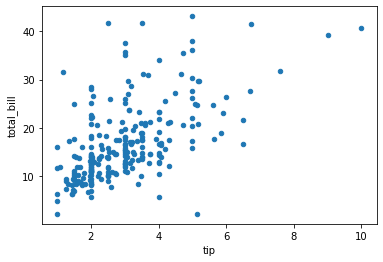

In [95]:
df.plot.scatter("tip","total_bill");

# Check Assumptions

In [96]:
from scipy.stats import shapiro

In [97]:
test_statistics, pvalue = shapiro(df["tip"])
print('Test statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

test_statistics, pvalue = shapiro(df["total_bill"])
print('Test statistics = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Test statistics = 0.8978, p-value = 0.0000
Test statistics = 0.9136, p-value = 0.0000


# Hypothesis Test

### Cofficient of Correlation

In [98]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [99]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

### Correlation Significance Test 

In [100]:
from scipy.stats.stats import pearsonr

In [101]:
test_statistics, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Cofficient of Correlation = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Cofficient of Correlation = 0.5767, p-value = 0.0000


## Nonparametric Hypothesis Test

In [102]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [105]:
test_statistics, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Cofficient of Correlation = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Cofficient of Correlation = 0.5937, p-value = 0.0000


In [106]:
test_statistics, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Cofficient of Correlation  = %.4f, p-value = %.4f' % (test_statistics, pvalue))

Cofficient of Correlation  = 0.4401, p-value = 0.0000
